In [23]:
import pandas as pd
import numpy as np
pd.set_option('max.rows',200)

## Train & Evaluate Model in US

### Load data

In [2]:
train = pd.read_csv('../data/processed/ultimate_train.csv')
val = pd.read_csv('../data/processed/ultimate_val.csv')
us = pd.read_csv('../data/processed/ultimate_test_us.csv')

In [39]:
y_train = train.log_price
y_val = val.log_price

In [41]:
X_train = train.drop(columns=['log_price'])
X_train['review_scores_rating'] = X_train['review_scores_rating'].fillna(np.mean(X_train['review_scores_rating']))
X_train['years_since_lastreview'] = X_train['years_since_lastreview'].fillna(np.mean(X_train['years_since_lastreview']))

X_val = val.drop(columns=['log_price'])

### Train Random Forest

### Default Parameters

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [38]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [52]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_val)

acc_train = rf.score(X_train, y_train)
acc = rf.score(X_val, y_val)

rmse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False)
rmse = mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)

mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))

medae_train = median_absolute_error(np.exp(y_train), np.exp(y_pred_train))
medae = median_absolute_error(np.exp(y_val), np.exp(y_pred))

In [54]:
print('Accuracy (Train):', round(acc_train,2)) 
print('Accuracy (Val):', round(acc,2))
print('')
print('RMSE (Train):', round(rmse_train,2))
print('RMSE (Val):', round(rmse,2))
print('')
print('Mean Abs Error (Train):', round(mae_train,2))
print('Mean Abs Error (Val):', round(mae,2))
print('')
print('Median Absolute Error (Train):', round(medae_train,2))
print('Median Absolute Error (Val):', round(medae,2))

Accuracy (Train): 0.95
Accuracy (Val): 0.66

RMSE (Train): 59.82
RMSE (Val): 118.8

Mean Abs Error (Train): 22.01
Mean Abs Error (Val): 53.44

Median Absolute Error (Train): 8.72
Median Absolute Error (Val): 24.46


### Random Search Parameters

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# rf parameters input into random search
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# produce random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [59]:
# random search best hyper parameters of model
rf_r = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_r, param_distributions = random_grid, n_iter = 20, cv = 3, 
                               verbose=2, random_state=0, n_jobs = -1)

In [60]:
# fit the random search model on 3 cross validations with 20 iters each
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 142.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 196.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [61]:
# get best random search parameters
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [63]:
rf_opt = RandomForestRegressor(n_estimators=800, min_samples_split=2, 
                                min_samples_leaf=2, max_features='auto',
                               max_depth=100, bootstrap=True).fit(X_train, y_train)

In [64]:
y_pred_train = rf_opt.predict(X_train)
y_pred = rf_opt.predict(X_val)

acc_train = rf_opt.score(X_train, y_train)
acc = rf_opt.score(X_val, y_val)

rmse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train), squared=False)
rmse = mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)

mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mae = mean_absolute_error(np.exp(y_val), np.exp(y_pred))

medae_train = median_absolute_error(np.exp(y_train), np.exp(y_pred_train))
medae = median_absolute_error(np.exp(y_val), np.exp(y_pred))

In [65]:
print('Accuracy (Train):', round(acc_train,2)) 
print('Accuracy (Val):', round(acc,2))
print('')
print('RMSE (Train):', round(rmse_train,2))
print('RMSE (Val):', round(rmse,2))
print('')
print('Mean Abs Error (Train):', round(mae_train,2))
print('Mean Abs Error (Val):', round(mae,2))
print('')
print('Median Absolute Error (Train):', round(medae_train,2))
print('Median Absolute Error (Val):', round(medae,2))

Accuracy (Train): 0.93
Accuracy (Val): 0.67

RMSE (Train): 71.98
RMSE (Val): 118.69

Mean Abs Error (Train): 25.18
Mean Abs Error (Val): 53.05

Median Absolute Error (Train): 9.59
Median Absolute Error (Val): 24.24


## Plotting & Interpretting Results

In [69]:
import matplotlib.pyplot as plt

In [89]:
diff_train = np.exp(y_train) - np.exp(y_pred_train)
diff_val = np.exp(y_val) - np.exp(y_pred)

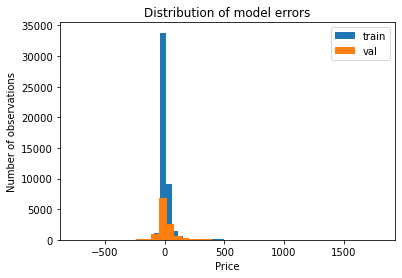

In [91]:
plt.hist(diff_train, bins=40, label='train')
plt.hist(diff_val, bins=40, label='val')
plt.title('Distribution of model errors')
plt.ylabel('Number of observations')
plt.xlabel('Price')
plt.legend()
plt.show()